<a href="https://colab.research.google.com/github/Duku-code/Duku/blob/main/Regression_Algorithm_Example_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
url = "https://raw.githubusercontent.com/Duku-code/Duku/main/Advertising.csv"
data = pd.read_csv(url)

In [57]:
import warnings 
warnings.filterwarnings('ignore')

In [58]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [59]:
data.drop(columns='Unnamed: 0', inplace = True)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [61]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


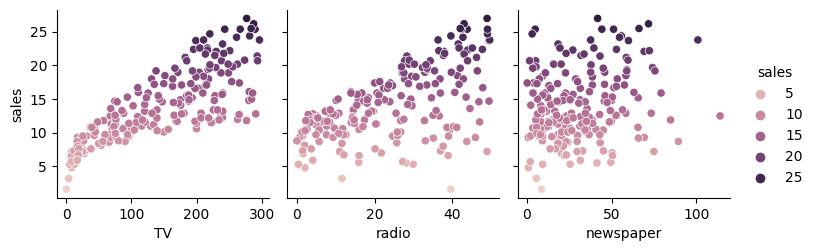

In [62]:
sns.pairplot(data = data, x_vars=['TV', 'radio', 'newspaper'], y_vars =['sales'], hue='sales')

In [63]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

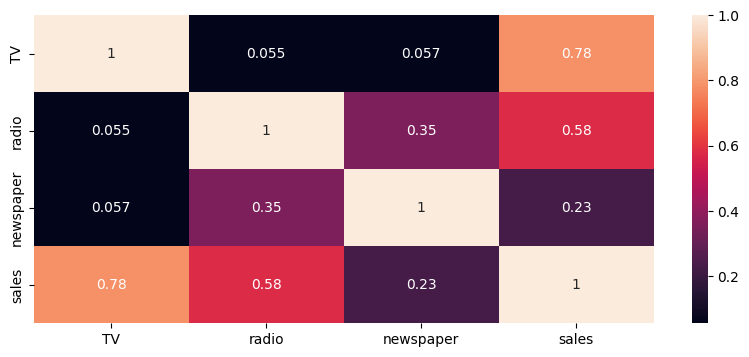

In [64]:
plt.figure(figsize=(10, 4))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [65]:
X = data.drop(['sales'], axis=1)
y = data['sales']

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(140, 3) (60, 3) (140,) (60,)


In [68]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [69]:
lr.fit(X_train, y_train)

LinearRegression()

In [70]:
lr.coef_

array([0.04695205, 0.17658644, 0.00185115])

In [71]:
lr.intercept_

2.937215734690609

In [72]:
y_pred = lr.predict(X_test)
y_pred[:5]

array([21.66318307, 16.44137936,  7.69144625, 17.9163172 , 18.67047113])

In [73]:
from sklearn.metrics import mean_absolute_error,  mean_squared_error

In [74]:
mse = mean_squared_error(y_test, y_pred, squared=True)
mse

1.928924907466573

In [75]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

1.388857410775697

In [76]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.0548328405073322

In [77]:
from sklearn.metrics import r2_score

In [78]:
r2_score(y_test, y_pred)

0.9224605706201434

In [79]:
y_pred = lr.predict(X_test)
residuals = (y_test - y_pred)
residuals[:5]

58     2.136817
40     0.158621
34     1.808554
102   -3.116317
184   -1.070471
Name: sales, dtype: float64

In [80]:
np.mean(residuals)

0.05556937575919937

<Axes: xlabel='sales', ylabel='Count'>

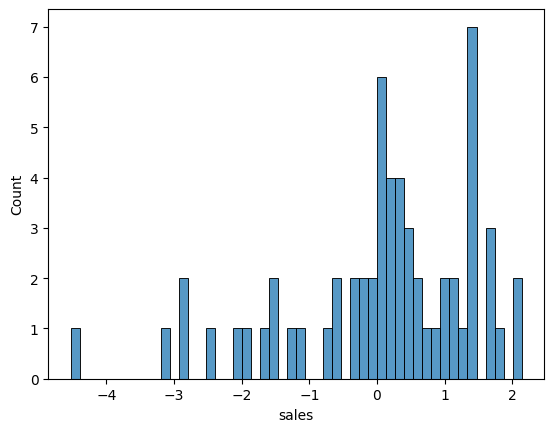

In [81]:
sns.histplot(residuals, bins=50)

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
def vif_score(X):
  data = X.values
  vif = [variance_inflation_factor(data,i) for i in range(data.shape[1])]
  vif_score = pd.DataFrame()
  vif_score['Features'] = X.columns
  vif_score['vif_score'] = vif
  return vif_score

In [84]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [85]:
vif_score(X)

,Features,vif_score
0,TV,2.486772
1,radio,3.285462
2,newspaper,3.055245


In [88]:
from sklearn.linear_model import Lasso
lr = Lasso()
lr.fit(X_train,y_train) # X_train --> 2d

print("Coefficients = ",lr.coef_,"intercept = ",lr.intercept_)
y_pred_test = lr.predict(X_test)


Coefficients =  [0.04686006 0.17290195 0.00077704] intercept =  3.06810140706013


In [89]:
r2_score(y_test,y_pred)

0.9224605706201434

In [90]:
from sklearn.linear_model import Ridge
lr = Ridge()
lr.fit(X_train,y_train) # X_train --> 2d

print("Coefficients = ",lr.coef_,"intercept = ",lr.intercept_)


Coefficients =  [0.04695201 0.17657991 0.00185302] intercept =  2.937315888244912


In [92]:
y_pred_test = lr.predict(X_train)
r2_score(y_test,y_pred)

0.9224605706201434

In [93]:
from sklearn.linear_model import ElasticNet
lr = ElasticNet()
lr.fit(X_train,y_train) # X_train --> 2d

print("Coefficients = ",lr.coef_,"intercept = ",lr.intercept_)

Coefficients =  [0.04690371 0.1742939  0.00144316] intercept =  3.0095659709201907


In [95]:
y_pred= lr.predict(X_test)
r2_score(y_test,y_pred)

0.9211708149361081